<a href="https://colab.research.google.com/github/AZEEMAKHLAQ/Play-Store-App-Review-Data-Analysis-/blob/main/Mohd_Azeem_Ansari_Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [ ]:
# import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
#getting dataframes
path1='/content/drive/MyDrive/Copy of Play Store Data.csv'
ps_df1 = pd.read_csv(path1)

path2='/content/drive/MyDrive/Copy of User Reviews.csv'
ps_df2 = pd.read_csv(path2)

In [ ]:
ps_df1.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [ ]:
ps_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
ps_df1.shape

(10841, 13)

In [ ]:
ps_df1.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [ ]:
ps_df1.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [ ]:
# type of Category
ps_df1['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [ ]:
# type of Type
ps_df1['Type'].unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

In [ ]:
# type of Content Rating
ps_df1['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated', nan], dtype=object)

In [ ]:
# look that the info of the dataframe
ps_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


From above information, we can say that in a data frame :

1.There are 13 columns of properties with 10841 rows of data.

2.Column 'Reviews', 'Size', 'Installs' and 'Price' are in the type of 'object'.

3.Values of column 'Size' are strings representing size in 'M' as Megabytes, 'k' as kilobytes and also 'Varies with devices'.

4.Values of column 'Installs' are strings representing install amount with symbols such as ',' and '+'.

5.Values of column 'Price' are strings representing price with symbol '$'.
Hence, we will need to do some data cleaning.

#Data cleaning- converting columns into required dataypes and removing NaN values

1) Cleaning the 'Reviews' data and convering its type from 'object' to 'float' to perform different operations.

In [ ]:
#Code
# As 'M' has been found the in reviews data i.e. Milliom this function replace it with Million

reviews = [i for i in ps_df1['Reviews']] # for loop to access each element in the Reviews columns
def clean_reviews(reviews_list): #function for cleaning data and converting M to million
    
    cleaned_data = [] # Empty list to store Cleaned Review Data.
    for review in reviews_list:
        if 'M' in review:
            review = review.replace('M','')
            review = float(review)* 1000000  # 1M = 1,000,000
        cleaned_data.append(review)
    return cleaned_data

ps_df1['Reviews'] = clean_reviews(reviews)
ps_df1['Reviews'] = ps_df1['Reviews'].astype(float) # Converting datatypes of each elemetn of Reviews Column from 'object to 'float'using astype() function.  

In [ ]:
type(ps_df1['Reviews'][2]) # checking datatype of an elemt of Reviews column i.e converted to float

numpy.float64

2. Cleaning the 'Size' Column data and converting its datatype from 'object' to 'float'

In [ ]:
# Code

# There we found one value with '1,000+' in one of record so we can remove it from our dataframe as it is not clear whether it is'M'(Megabyte) or 'k(kilobyte)'.
index = ps_df1[ps_df1['Size'] == '1,000+'].index
ps_df1.drop(axis=0, inplace=True, index=index)

sizes = [i for i in ps_df1['Size']]  # for loop to access each element in the Size columns

#As sizes are represented in 'M' and 'k', we remove 'M' and convert 'k'/kilobytes into megabytes

def clean_sizes(sizes_list): # function for cleaning Size data i.e  removing M and converting kilobytes to megabytes so that all alements have same unit.
    
    
    cleaned_data = [] # Empty list to store Cleaned Size Data.

    for size in sizes_list:
        if 'M' in size:
            size = size.replace('M', '') # removing 'M
            size = float(size)
        elif 'k' in size:
            size = size.replace('k', '')
            size = float(size)
            size = size/1024  # converting kb to mb as 1 megabyte = 1024 kilobytes
        
        elif 'Varies with device' in size: 
            size = float(0) # replacing 'Varies with device' with value 0
        cleaned_data.append(size)
    return cleaned_data

ps_df1['Size'] = clean_sizes(sizes)
ps_df1['Size'] = ps_df1['Size'].astype(float) # Converting datatypes of each elemetn of Size Column from 'object to 'float' using astype() function. 

3) Cleaning the 'Installs' data and convering its type from 'object' to 'float'.

In [ ]:
# Code
def clean_installs(install): # function for cleaning 'Installs' column data i.e  removing '+' ans','
  install = install.replace('+','')  
  install = install.replace(',','')
  install = int(install)
  return install
ps_df1['Installs'] = ps_df1['Installs'].apply(lambda x : clean_installs(x))

In [ ]:
ps_df1['Installs'] =ps_df1['Installs'].astype(float) # Converting its datatype to float using astype() function

In [ ]:
type(ps_df1['Installs'][2])

numpy.float64

4) Cleaning the 'Price' data and converting its datatype from 'object' to 'float'.

In [ ]:
#Code
prices = [i for i in ps_df1['Price']] # for loop to access each element in the 'Price' column

def clean_prices(prices_list):  # function for cleaning Price data i.e removing $(Dollar) sign

    cleaned_data = [] # Empty list to store Cleaned Price Data.
    for price in prices_list:
        if '$' in price:
            price = price.replace('$', '') # removing $ sign
        cleaned_data.append(price)
    return cleaned_data

ps_df1['Price'] = clean_prices(prices)
ps_df1['Price'] = ps_df1['Price'].astype(float)# Converting datatypes of each elemetn of 'Price' Column from 'object to 'float' using astype() function. 

In [ ]:
# checking the information in the apps dataframe to verify the cleaned columns
ps_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  float64
 4   Size            10840 non-null  float64
 5   Installs        10840 non-null  float64
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(5), object(8)
memory usage: 1.4+ MB


** From above table, we can see that our requires data has been cleaned, converted to requires datatypes and now it is ready to perform different operations 

In [ ]:
# checking  for null values
ps_df1.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

There are 1474 null values in Rating column, that is a significant amount of data. So, we will replace these null values with its Median

In [ ]:
# Code
def replace_with_median(lsts): # function to replace the rows with null values with median values 
    return lsts.fillna(lsts.median()) # replacing null values woth median usinf fillna() and median() functions

ps_df1['Rating'] = ps_df1['Rating'].transform(replace_with_median)
ps_df1['Rating'] = ps_df1['Rating'].astype(float)

In [ ]:
# removing  the record value where 'Type' is having null value since it is one column only. using drop() function
index = ps_df1[ps_df1['Type'].isna()].index
ps_df1.drop(axis=0, inplace=True, index=index)

In [ ]:
# checking for null values
ps_df1.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

From above information, we can say that all the required null values has been handled.

some more cleaning and dropping off duplicates values

In [ ]:
# grouping the data starting with App and Reviews
ps_df1 = ps_df1.groupby(['App', 'Reviews', 'Category', 'Rating', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 
                           'Last Updated', 'Current Ver', 'Android Ver'], as_index=False)
# reassign Installs values with their mean
ps_df1 = ps_df1['Installs'].mean()
# sort the dataframe by Reviews descendingly
ps_df1.sort_values(by='Reviews', ascending=False, inplace=True)
# drop duplicate rows based on App 
ps_df1.drop_duplicates(subset=['App'], inplace=True)
ps_df1

,App,Reviews,Category,Rating,Size,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs
4534,Facebook,78158306.0,SOCIAL,4.1,0.0,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device,1.000000e+09
9661,WhatsApp Messenger,69119316.0,COMMUNICATION,4.4,0.0,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,1.000000e+09
5731,Instagram,66577446.0,SOCIAL,4.5,0.0,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device,1.000000e+09
6546,Messenger – Text and Video Chat for Free,56646578.0,COMMUNICATION,4.0,0.0,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device,1.000000e+09
2701,Clash of Clans,44893888.0,GAME,4.6,98.0,Free,0.0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.1 and up,1.000000e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4372,FG Autumn Photo Puzzle,0.0,FAMILY,4.3,4.6,Free,0.0,Everyone,Puzzle,"August 23, 2017",1.0,4.0 and up,1.000000e+01
4369,FE Other Disciplines Engineering Exam Prep,0.0,FAMILY,4.3,21.0,Free,0.0,Everyone,Education,"July 27, 2018",5.33.3669,5.0 and up,1.000000e+02
9033,Thyroid Nodules,0.0,MEDICAL,4.3,20.0,Free,0.0,Everyone,Medical,"July 14, 2018",1.0,4.3 and up,1.000000e+01
185,ACCEPT CE MARKING,0.0,PRODUCTIVITY,4.3,30.0,Free,0.0,Everyone,Productivity,"June 28, 2018",1.0,4.1 and up,1.000000e+01


In [ ]:
# check on statistical information of the dataframe
ps_df1.describe()

,Reviews,Rating,Size,Price,Installs
count,9.648000e+03,9648.000000,9648.000000,9648.000000,9.648000e+03
mean,2.170487e+05,4.192485,17.820208,1.098122,7.806898e+06
std,1.832460e+06,0.496210,21.503151,16.861193,5.379975e+07
min,0.000000e+00,1.000000,0.000000,0.000000,0.000000e+00
25%,2.500000e+01,4.000000,2.900000,0.000000,1.000000e+03
50%,9.745000e+02,4.300000,9.200000,0.000000,1.000000e+05
75%,2.949750e+04,4.500000,25.000000,0.000000,1.000000e+06
max,7.815831e+07,5.000000,100.000000,400.000000,1.000000e+09


The above data is cleaned upto an extent and ready for EDA.

---



---



---




#**Exploratory Data Analysis and Visualization**

# 1. Which are the top 5 apps installed by the user?

In [ ]:
# sorting 'Installs' values in descending order
top_5_apps = ps_df1.sort_values(by=['Installs'], ascending=False,)
top_5_apps.head(5)

,App,Reviews,Category,Rating,Size,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs
4534,Facebook,78158306.0,SOCIAL,4.1,0.0,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device,1.000000e+09
5211,Google Photos,10859051.0,PHOTOGRAPHY,4.5,0.0,Free,0.0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,1.000000e+09
5229,Google+,4831125.0,SOCIAL,4.2,0.0,Free,0.0,Teen,Social,"July 26, 2018",Varies with device,Varies with device,1.000000e+09
5122,Gmail,4604483.0,COMMUNICATION,4.3,0.0,Free,0.0,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device,1.000000e+09
5221,Google Street View,2129707.0,TRAVEL_AND_LOCAL,4.2,0.0,Free,0.0,Everyone,Travel & Local,"August 6, 2018",Varies with device,Varies with device,1.000000e+09


In [ ]:
print(f'The the top 5 apps installed by the user are: {", ".join(ps_df1["App"].head(5))}')

The the top 5 apps installed by the user are: Facebook, WhatsApp Messenger, Instagram, Messenger – Text and Video Chat for Free, Clash of Clans


# 2. Which are the top 5 apps most reviewed by the users ?

In [ ]:
#  grouping app data on the basis of App, Category, Rating using group by functions and addind their reviews using sum() function 
df = ps_df1.groupby(by=['App', 'Category', 'Rating'])[['Reviews']].sum().reset_index() 
df = df.sort_values(by=['Reviews'], ascending=False) sorting 'Reviews' values in descending order
df.head(5)

,App,Category,Rating,Reviews
4324,Facebook,SOCIAL,4.1,78158306.0
9031,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0
5395,Instagram,SOCIAL,4.5,66577446.0
6158,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578.0
2562,Clash of Clans,GAME,4.6,44893888.0


In [ ]:
print(f'The top 5 apps most reviewed by the users are: {", ".join(df["App"].head(5))}')

The top 5 apps most reviewed by the users are: Facebook, WhatsApp Messenger, Instagram, Messenger – Text and Video Chat for Free, Clash of Clans


# 3. Which are the top 5 expensive apps available on the playstore?

In [ ]:
# sorting 'Price' values in descending order
df = ps_df1.sort_values(by=['Price'], ascending=False)
df.head(5)

,App,Reviews,Category,Rating,Size,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs
5653,I'm Rich - Trump Edition,275.0,LIFESTYLE,3.6,7.3,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up,10000.0
5654,I'm Rich/Eu sou Rico/أنا غني/我很有錢,0.0,LIFESTYLE,4.3,40.0,Paid,399.99,Everyone,Lifestyle,"December 1, 2017",MONEY,4.1 and up,0.0
5643,I am Rich Plus,856.0,FAMILY,4.0,8.7,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up,10000.0
5648,I am rich (Most expensive app),129.0,FINANCE,4.1,2.7,Paid,399.99,Teen,Finance,"December 6, 2017",2,4.0.3 and up,1000.0
5627,I Am Rich Premium,1867.0,FINANCE,4.1,4.7,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up,50000.0


In [ ]:
print(f'The top 5 expensive apps available on the playstore are: {", ".join(df["App"].head(5))}')

The top 5 expensive apps available on the playstore are: I'm Rich - Trump Edition, I'm Rich/Eu sou Rico/أنا غني/我很有錢, I am Rich Plus, I am rich (Most expensive app), I Am Rich Premium


# 4. Which are the 5 apps from the 'Finance' category  having the lowest rating?

In [ ]:
df = ps_df1[ps_df1['Category'] == 'FINANCE'] # fethching finance value in Category column
df = df.sort_values(by=['Rating'], ascending=True) #sorting its vaues by Rating in ascending order
df.head(5)

,App,Reviews,Category,Rating,Size,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs
1998,CB Mobile Biz,3.0,FINANCE,1.0,8.4,Free,0.00,Everyone,Finance,"February 22, 2016",4.4.1255,4.0 and up,500.0
8836,Tech CU Card Manager,2.0,FINANCE,1.0,7.2,Free,0.00,Everyone,Finance,"July 25, 2017",1.0.1,4.0 and up,1000.0
3998,EY TaxChat,44.0,FINANCE,1.2,27.0,Free,0.00,Everyone,Finance,"April 9, 2018",3.24.0,6.0 and up,1000.0
1997,CB Mobile Access,57.0,FINANCE,1.5,25.0,Free,0.00,Everyone,Finance,"February 26, 2018",4.3.6,4.2 and up,1000.0
1682,Bitcoin BX Thailand PRO,21.0,FINANCE,1.7,21.0,Paid,4.99,Everyone,Finance,"October 22, 2017",5.0,4.0.3 and up,100.0


In [ ]:
print(f'The 5 apps from the Finance category having the lowest rating are: {", ".join(df["App"].head(5))}')

The 5 apps from the Finance category having the lowest rating are: CB Mobile Biz, Tech CU Card Manager, EY TaxChat, CB Mobile Access, Bitcoin BX Thailand PRO


# 5. Which are the top 5 most installed apps in Game category?

In [ ]:
df = ps_df1[ps_df1['Category'] == 'GAME'] # fethching Game value in Category column
df = df.sort_values(by=['Installs'], ascending=False) #sorting its values by Rating in descending order
df.head(5)

,App,Reviews,Category,Rating,Size,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs
8619,Subway Surfers,27725352.0,GAME,4.5,76.0,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up,1.000000e+09
2480,Candy Crush Saga,22430188.0,GAME,4.4,74.0,Free,0.0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up,5.000000e+08
6849,My Talking Tom,14892469.0,GAME,4.5,0.0,Free,0.0,Everyone,Casual,"July 19, 2018",4.8.0.132,4.1 and up,5.000000e+08
8862,Temple Run 2,8119154.0,GAME,4.3,62.0,Free,0.0,Everyone,Action,"July 5, 2018",1.49.1,4.0 and up,5.000000e+08
7592,Pou,10486018.0,GAME,4.3,24.0,Free,0.0,Everyone,Casual,"May 25, 2018",1.4.77,4.0 and up,5.000000e+08


In [ ]:
print(f'The top 5 most installed apps in Game category are: {", ".join(df["App"].head(5))}')

The top 5 most installed apps in Game category are: Subway Surfers, Candy Crush Saga, My Talking Tom, Temple Run 2, Pou


#**Visualization work**

# 6. Looking for category of apps on a bar grapph

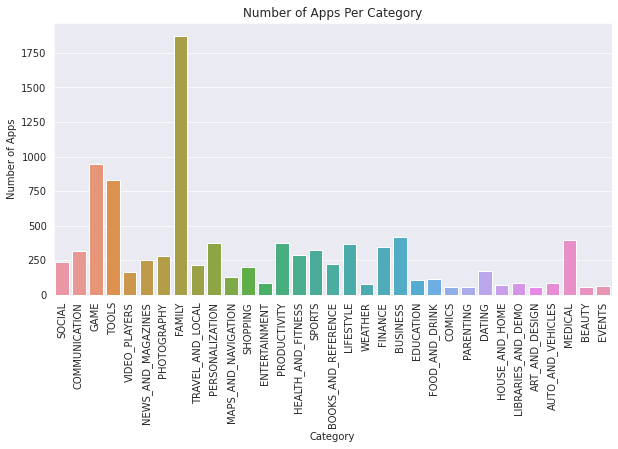

In [ ]:
# get the number of apps for each category
plt.figure(figsize=(10, 5))
sns.set_style('darkgrid')
sns.countplot(x='Category', data=ps_df1)
plt.title('Number of Apps Per Category')
plt.xticks(rotation=90)
plt.ylabel('Number of Apps')
plt.show()

From the above graph we can figure out that most of the apps available on the play store are from the categories of 'FAMILY', 'GAME' and also 'TOOLS.

# 7. Sizes of Application

Text(0.5, 1.0, 'Boxplot of Size values')

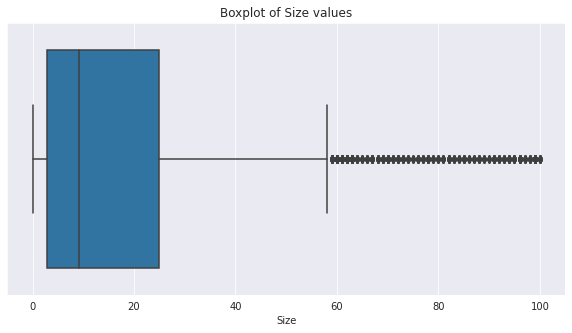

In [ ]:

plot_figure = plt.figure(figsize =(10,5))
sns.boxplot(data = ps_df1['Size'] ,orient="h", x= ps_df1['Size'])

median = ps_df1['Size'].median()

plt.title ("Boxplot of Size values")

From the above boxplot, it can be concluded that the size of  majority of the apps available on the Play Store are within the range of 5Mb to 25Mb and their median size is around 9Mb.

#8. Rating

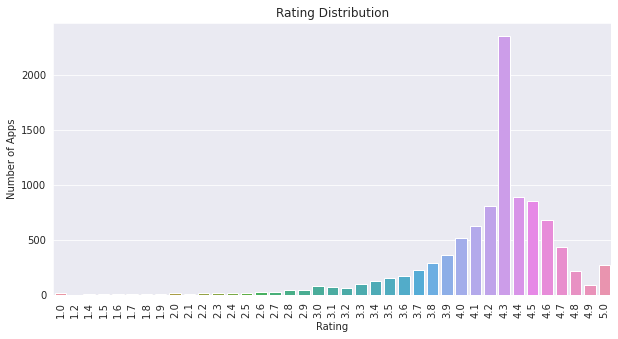

In [ ]:
# show the distribution of rating
plt.figure(figsize=(10, 5))
sns.countplot(x='Rating', data=ps_df1)
plt.title('Rating Distribution')
plt.xticks(rotation=90)
plt.ylabel('Number of Apps')
plt.show()

From the above plotting, it can be figure out that most of the apps in the Play Store are having rating higher than 4 or in the range of 4 to 4.7.

#9. Types of Applications

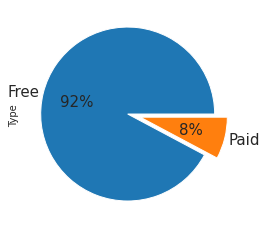

In [ ]:
# application type distribution
# plotting pie chart for the Apps Type available in playstore from that we find which apps type are mostly using bu users.
## For plotting this graph we take the help of matplotlib and seborn library
types_of_ps_df = ps_df1.Type.value_counts()
types_of_ps_df.plot(kind='pie', fontsize=15, explode= (0.05,0.1), autopct='%1.0f%%', pctdistance=0.60, labeldistance=1.05)

From the above pie chart, it can be concluded that majority of the apps available on the Play Store are Free apps(i.e. 92%) and only few apps are paid (i.e. 8%) .

#10. Installs

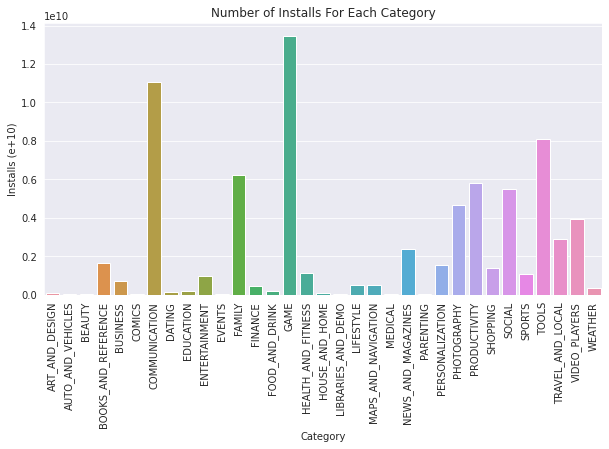

In [ ]:
# get the number of installs for each category
categories = ps_df1.groupby('Category')
installs_sum_df = categories[['Installs']].sum()
installs_sum_df = installs_sum_df.reset_index()  # to convert groupby object into dataframe

plt.figure(figsize=(10, 5))
sns.barplot(x='Category', y='Installs', data=installs_sum_df)
plt.xticks(rotation=90)
plt.ylabel('Installs (e+10)')
plt.title('Number of Installs For Each Category')
plt.show()

From the above graph, plotting of number of installs for each category, we can conclude that most of the apps being downloaded and installed are from the categories of 'GAME' and 'COMMUNICATION'.

In [ ]:
# sample line